# Project: FoodHub Data Analysis


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

## Data Cleaning

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [444]:
df.shape

(1898, 9)

In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [446]:
df['day_of_the_week'].value_counts()

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

In [4]:
df['restaurant_name'].value_counts()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

In [5]:
df['cuisine_type'].value_counts()

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64

In [6]:
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

In [447]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [4]:
df.describe().round(2)

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1898.00,1898.00,1898.00,1898.00,1898.00
mean,1477495.50,171168.48,16.50,27.37,24.16
std,548.05,113698.14,7.48,4.63,4.97
min,1476547.00,1311.00,4.47,20.00,15.00
25%,1477021.25,77787.75,12.08,23.00,20.00
50%,1477495.50,128600.00,14.14,27.00,25.00
75%,1477969.75,270525.00,22.30,31.00,28.00
max,1478444.00,405334.00,35.41,35.00,33.00


#### Observations: 

* The DataFrame has 9 columns and 1898 rows as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.
* There aren't any missing values.
* Data types correspond to the values in each column.
* There are no null values either.
* There aren't duplicated rows.

Since the data is already in good shape and do not need cleaning, we proceed with the Exploratory Data Analysis to explore the data visually and statistically to understand patterns, relationships, and initial insights.

## Exploratory Data Analysis (EDA)

### Univariate Analysis

#### Order ID

In [450]:
#Unique order_id
df['order_id'].nunique()

1898

#### Customer ID

In [451]:
#Unique Customer_id 
df['customer_id'].nunique()

1200

#### Restaurant name

In [452]:
#Unique Restaurant name
df['restaurant_name'].nunique()

178

#### Cuisine type

In [453]:
#Unique Cuisine type
df['cuisine_type'].nunique()

14

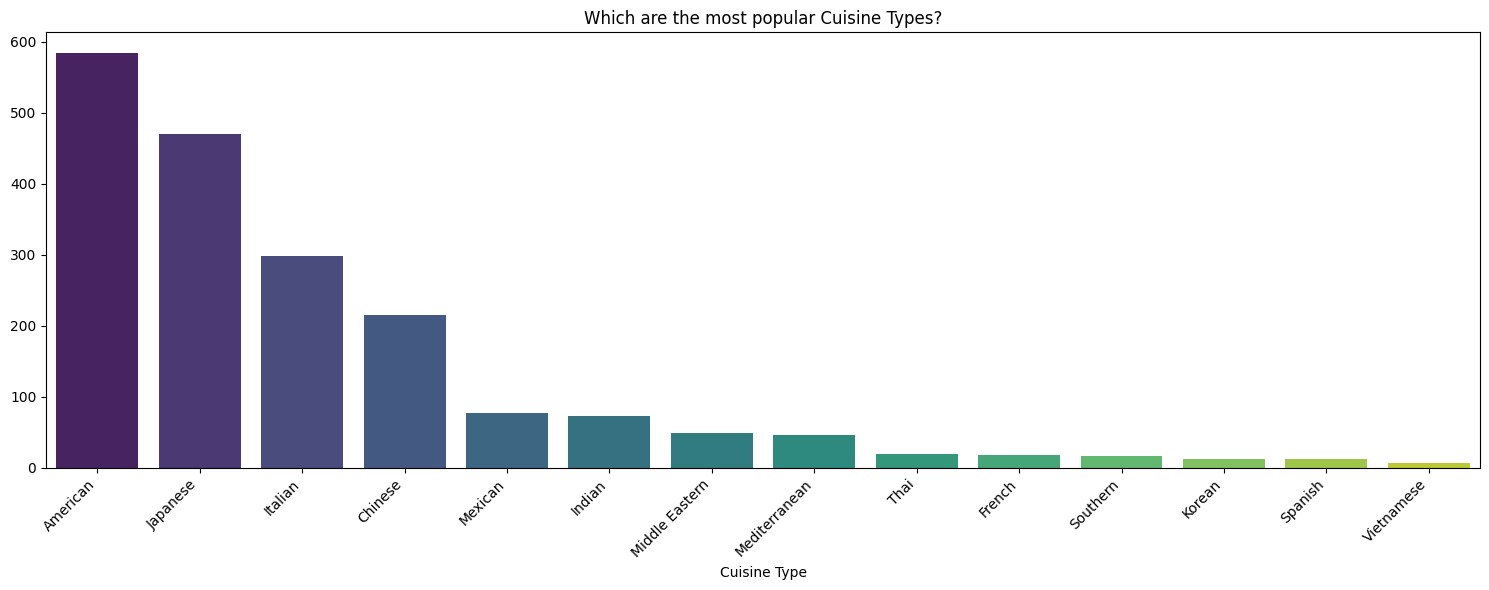

In [5]:
# Calculate the order of cuisine types based on their counts
cuisine_order = df['cuisine_type'].value_counts().index

# Create the count plot with ordered cuisine types
plt.figure(figsize = (15,6))
sns.countplot(data = df, x = 'cuisine_type', order=cuisine_order, palette='viridis')

# Add labels and title
plt.xlabel('Cuisine Type')
plt.ylabel('')
plt.title('Which are the most popular Cuisine Types?')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


#### Observations: The analysis reveals distinct customer preferences for specific cuisine types, with American, Japanese, and Italian cuisines emerging as the most favored choices. These cuisines exhibit order frequencies that significantly surpass those of other options, such as Spanish or Vietnamese cuisines, which receive orders less than a tenth as often. This pronounced discrepancy underscores the popularity of American, Japanese, and Italian offerings and suggests a potential avenue for strategic focus, such as enhancing menu offerings, promotions, or marketing campaigns for these favored cuisine types, while considering ways to elevate visibility and appeal for other options.

#### Cost of the order

In [455]:
#Unique Cost of the order
df['cost_of_the_order'].nunique()

312

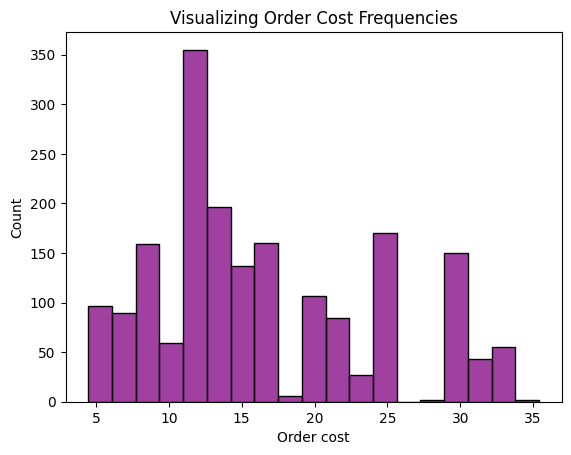

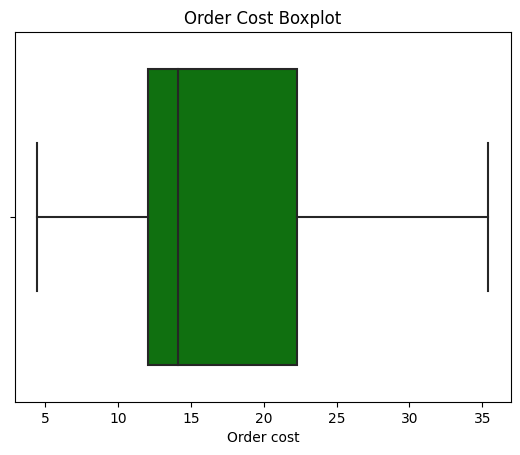

In [4]:
# Histogram for the cost of order
sns.histplot(data=df,x='cost_of_the_order', color='purple') 
plt.xlabel('Order cost')
plt.title('Visualizing Order Cost Frequencies')
plt.show()

# Boxplot for the cost of order
sns.boxplot(data=df,x='cost_of_the_order', color='green') 
plt.xlabel('Order cost')
plt.title('Order Cost Boxplot')
plt.show() 

#### Observation: Order costs exhibit a diverse range, spanning from $5 to $35. Notably, the most frequent order cost centers around $14. This distribution indicates that a significant number of customers opt for orders at this price point. This insight can guide pricing strategies and promotional efforts, potentially tailoring offerings to align with the prevalent order cost while also exploring opportunities to attract a wider customer base across different price ranges.

#### Day of the week

In [457]:
#Unique Day of the week
df['day_of_the_week'].nunique()

2

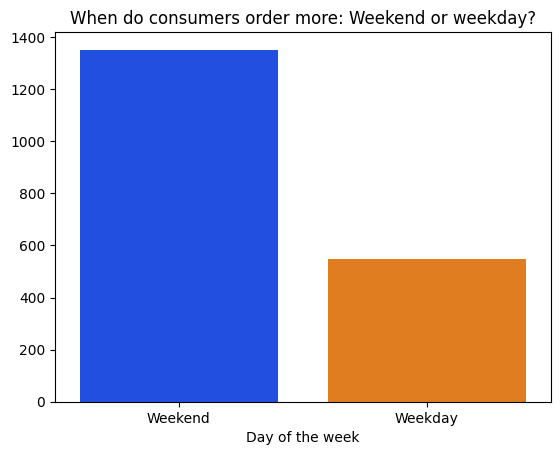

In [458]:
sns.countplot(data= df, x='day_of_the_week', palette='bright')
plt.xlabel('Day of the week')
plt.ylabel('')
plt.title('When do consumers order more: Weekend or weekday?')
plt.show()


#### Observations: The plot clearly demonstrates a notable trend – consumer orders on weekends are more than double compared to weekdays. This observation underscores a strategic opportunity for Foodhub to enhance its weekday business. Implementing promotional strategies, such as meal deals or discounts, during weekdays could effectively stimulate increased orders and engagement. By capitalizing on this insight, Foodhub has the potential to optimize its service utilization throughout the week and drive growth in customer activity on weekdays.

#### Rating

In [459]:
#Unique rating
df['rating'].nunique()

4

In [17]:
# Let'se count the number of orders that are not rated
not_rated_count = df[df['rating'] == 'Not given'].shape[0]

#option 2: not_rated_count = df[df['rating'] == 'Not given']['rating'].count()

percent1 = (not_rated_count /df['rating'].count())*100

# Display the count of orders not rated
print("Out of", df['rating'].count(), "orders,", not_rated_count, "orders were not rated. Representing", round(percent1,2),"percent of the total amount" )


Out of 1898 orders, 736 orders were not rated. Representing 38.78 percent of the total amount


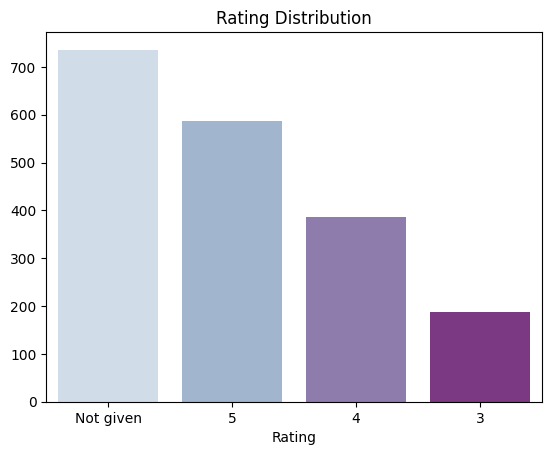

In [460]:
# Calculate the order of ratings based on their counts
rating_order = df['rating'].value_counts().index

# Create the count plot
sns.countplot(data=df, x='rating', order=rating_order, palette='BuPu')
plt.xlabel('Rating')
plt.ylabel('')
plt.title('Rating Distribution')
plt.show()

#### Observation: The analysis reveals that many orders lack ratings, suggesting an opportunity for Foodhub to encourage more feedback. The prevalence of the highest rating (5) indicates that, on average, customers enjoy the service. Incentivizing feedback could provide better insights into preferences and enhance customer satisfaction.

#### Food preparation time

In [461]:
#Unique food preparation time
df['food_preparation_time'].nunique()

16

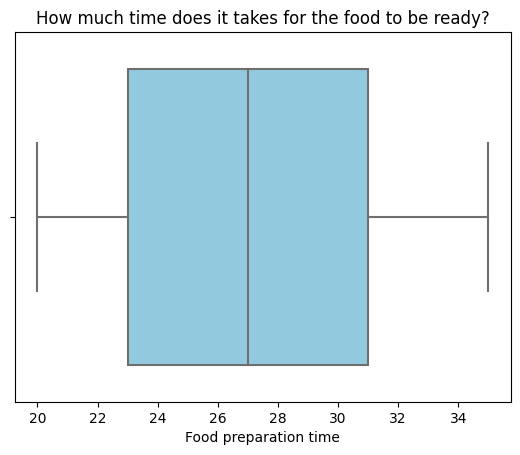

In [462]:
#Boxplot for food preparation time
sns.boxplot(data = df, x='food_preparation_time', color='skyblue')
plt.xlabel('Food preparation time')
plt.title('How much time does it takes for the food to be ready?')
plt.show()

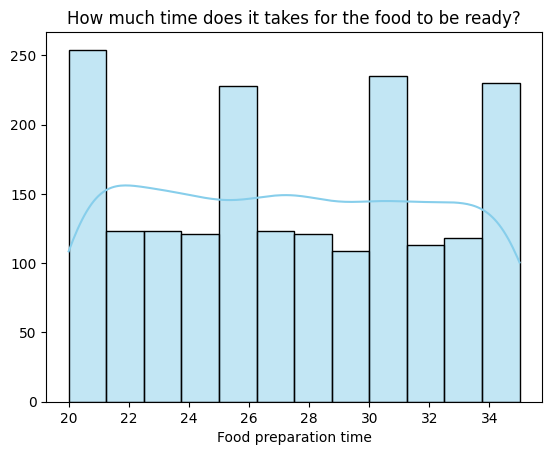

In [463]:
#Histogram for food preparation time
sns.histplot(data=df, x='food_preparation_time', color='skyblue', kde=True)
plt.xlabel('Food preparation time')
plt.ylabel('')
plt.title('How much time does it takes for the food to be ready?')
plt.show()

#### Observations: Based on the analysis of the plots, it can be inferred that the food preparation time typically falls within the range of approximately 20 to 34 minutes. The distribution of food preparation times exhibits a mode around the 27-minute mark, indicating that this duration is the most frequently observed interval for food readiness. This finding underscores the importance of optimizing kitchen operations to consistently achieve this efficient food preparation duration, which aligns with customer expectations and contributes to a positive dining experience.

#### Delivery time

In [464]:
#Unique delivery time
df['delivery_time'].nunique()

19

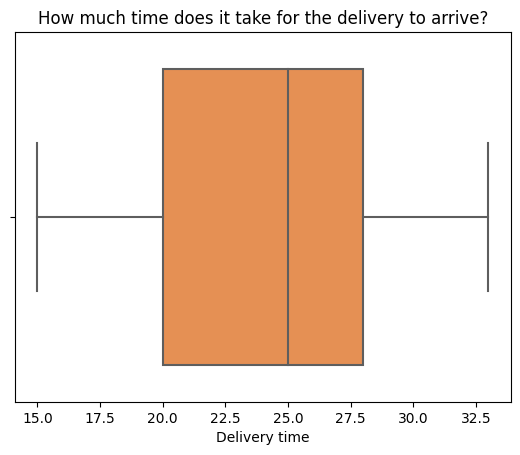

In [465]:
#Boxplot for delivery time
sns.boxplot(data=df, x='delivery_time', palette='Oranges')
plt.xlabel('Delivery time')
plt.title('How much time does it take for the delivery to arrive?')
plt.show()

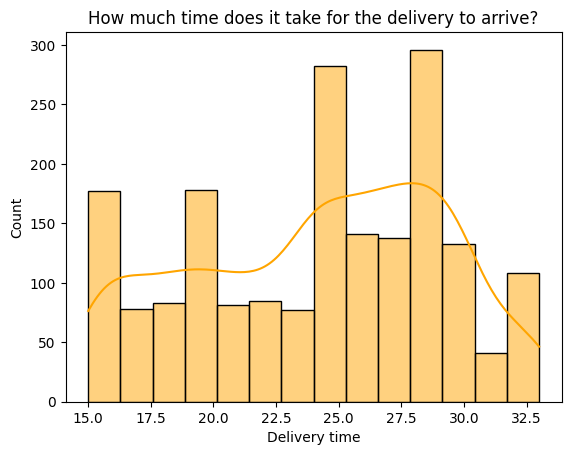

In [466]:
#Histogram for delivery time
sns.histplot(data=df, x='delivery_time', color='orange', kde=True)
plt.xlabel('Delivery time')
plt.title('How much time does it take for the delivery to arrive?')
plt.show()

#### Observations: Based on the insights derived from the plots, it is evident that the food delivery time typically spans a duration of approximately 15 to 32 minutes. The distribution of delivery times reveals a prominent mode at approximately 25 minutes, indicating that this specific timeframe corresponds to the most frequently occurring interval for food deliveries. This observation underscores the significance of maintaining efficient and consistent delivery processes to ensure timely service, thereby enhancing customer satisfaction and reinforcing the establishment's reputation for prompt and reliable service.

### Let's check the top 5 restaurants in terms of the number of orders received

In [467]:
top_restaurants = df['restaurant_name'].value_counts().head()
top_restaurants


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

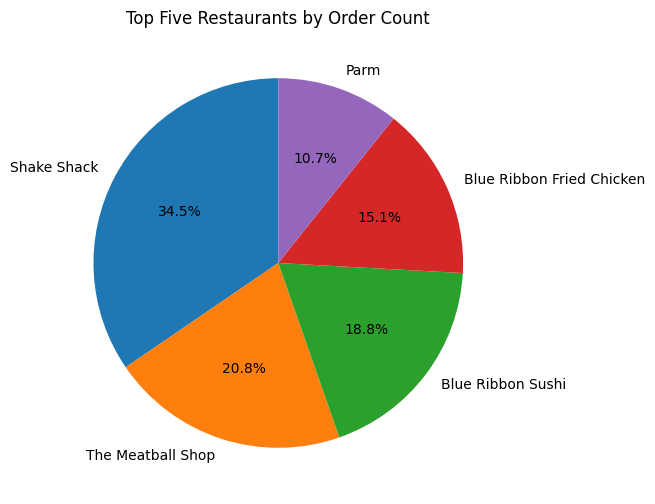

In [468]:
# Let's create a pie chart to visually these results more graphically:
plt.figure(figsize=(6, 6))
plt.pie(top_restaurants, labels=top_restaurants.index, autopct='%1.1f%%', startangle=90)

plt.title('Top Five Restaurants by Order Count')
plt.show()

#### Observations: The top 5 restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm


### Multivariate Analysis

#### Correlation among all quantitative variables

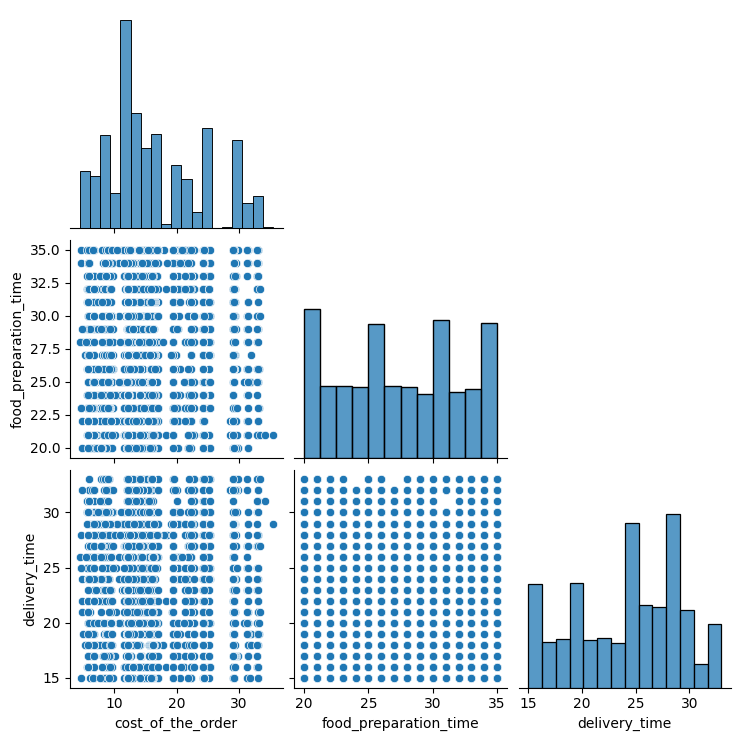

In [481]:
#Let's compare the correlation among all quantitative variables
sns.pairplot(data=df, vars=['cost_of_the_order', 'food_preparation_time', 'delivery_time'], corner=True)
plt.show()

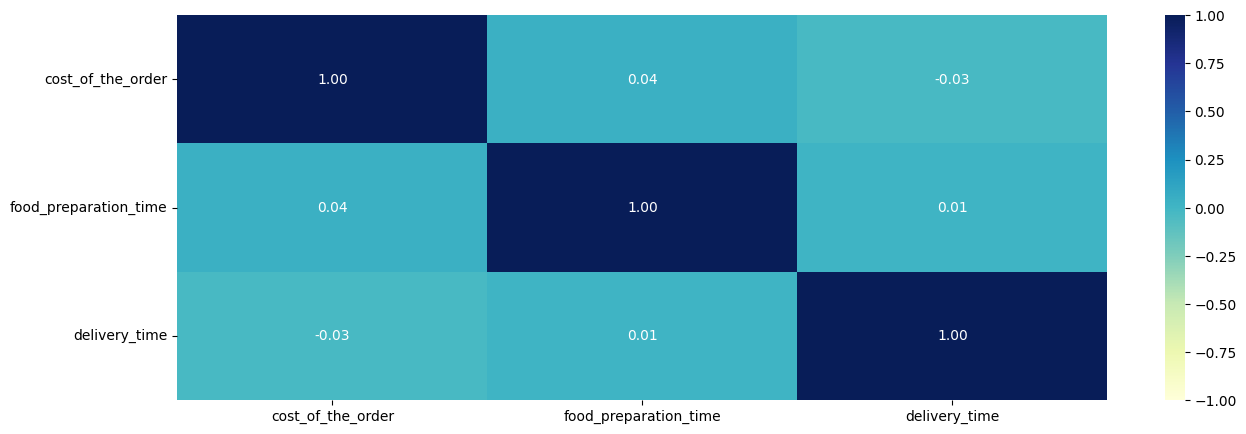

In [489]:
#Let's underdand better with a heatmap
plt.figure(figsize=(15, 5))
sns.heatmap(data=df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr(), annot=True,vmin=-1, fmt=".2f", cmap="YlGnBu")
plt.show()

#### Observation: There is no correlation between these variabels: 'cost_of_the_order', 'food_preparation_time' and 'delivery_time', which makes sense considering that the variables per se do not seem to affect each other.

#### Cuisine vs Food Preparation time

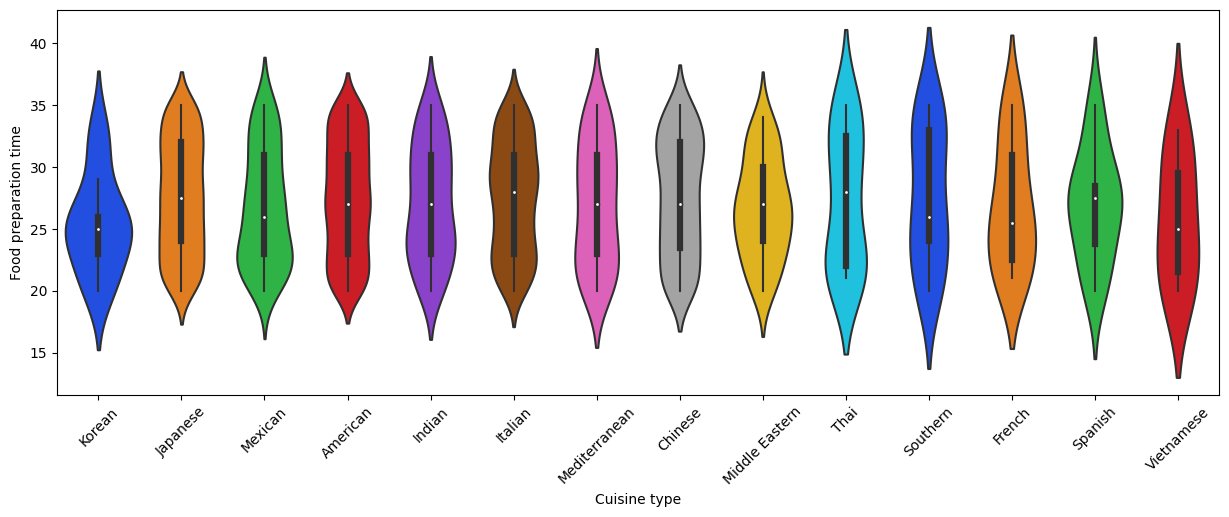

In [370]:
#We will evaluate the relationship between Cuisine and Food preparation time
plt.figure(figsize=(15,5))
sns.violinplot(data=df, x='cuisine_type', y='food_preparation_time', palette='bright') 
plt.xlabel('Cuisine type')
plt.ylabel('Food preparation time')
plt.xticks(rotation = 45)
plt.show()

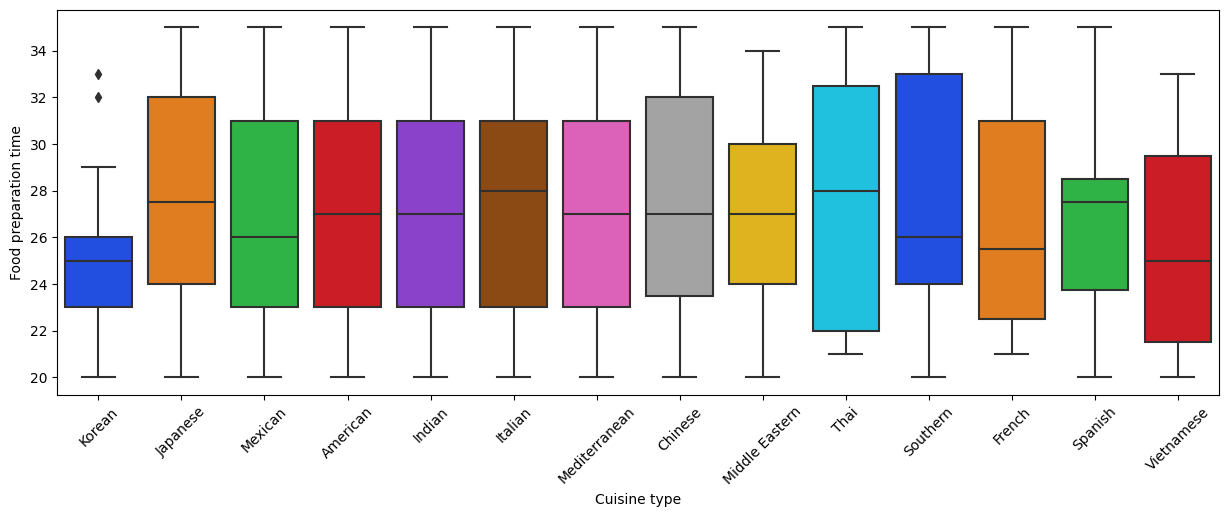

In [371]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time', palette='bright') 
plt.xlabel('Cuisine type')
plt.ylabel('Food preparation time')
plt.xticks(rotation = 45)
plt.show()

#### Observation: The type of cuisine that takes  the more time to prepare on average is the italian and Thai cuisine. The ones that take the least on average are the Korean, Southern and Vietnamise cuisine. Overall the variability in food preparation time across cuisines is similar, meaning that on average all the cusines take around the same about of time with a few variations.

#### Day of the Week vs Delivery time

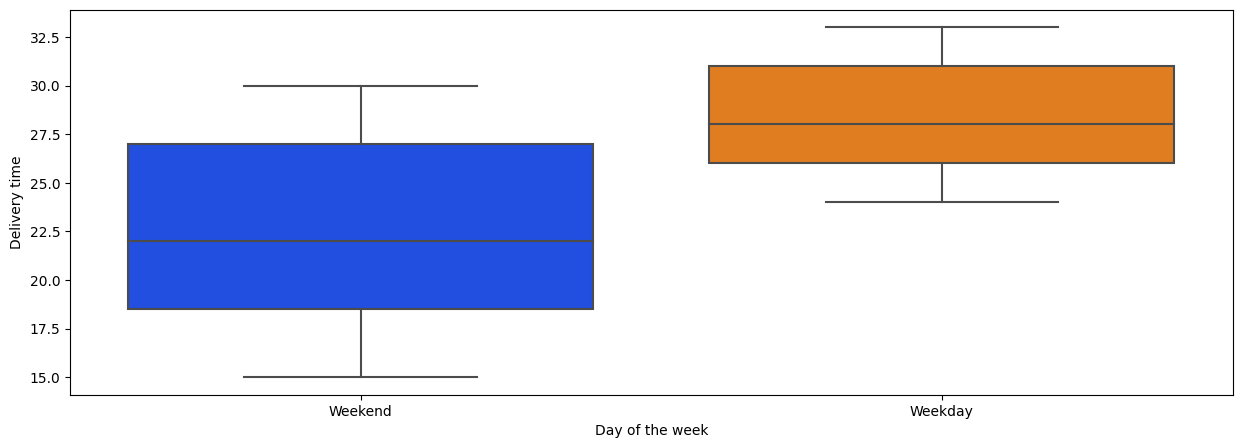

In [382]:
#We will evaluate the relationship between Day of the week and Delivery time
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time', palette='bright') 
plt.xlabel('Day of the week')
plt.ylabel('Delivery time')
plt.show()

#### Observations: The typical delivery time on weekdays is greater than in weekends. This could indicate that the restaurant might be experiencing higher demand or congestion during certain days, impacting delivery efficiency.

#### Cuisine vs Order Cost

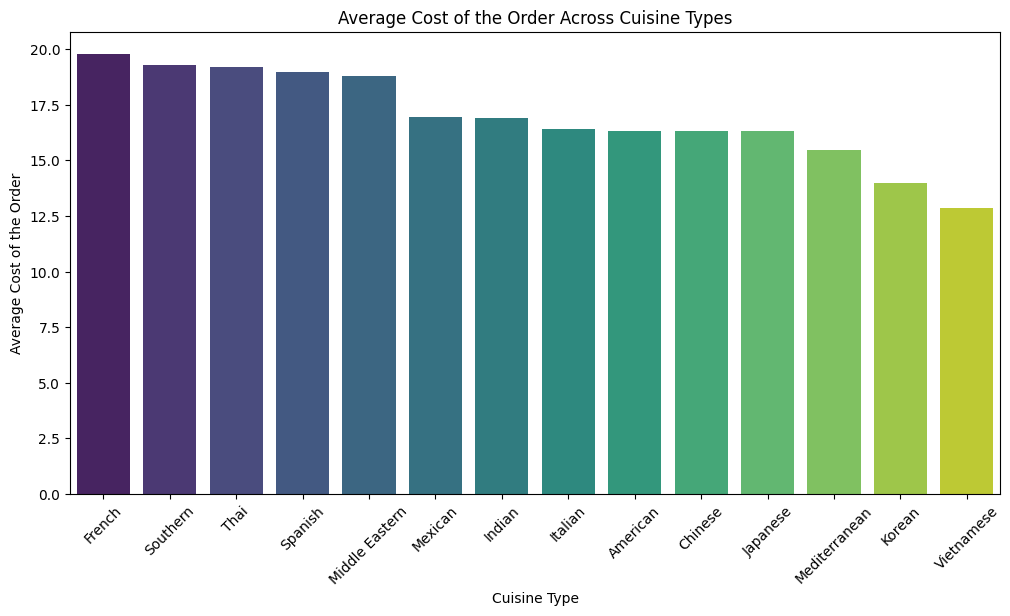

In [433]:
# Lets visualize Cuisine vs average order cost in a barplot:

# Calculate average cost of the order for each cuisine type
avg_cost_per_cuisine = df.groupby('cuisine_type')['cost_of_the_order'].mean()

# Sort the average costs in descending order
avg_cost_per_cuisine = avg_cost_per_cuisine.sort_values(ascending=False)

# Create a bar plot to show the different means across cuisine types
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x=avg_cost_per_cuisine.index, y=avg_cost_per_cuisine.values, palette='viridis')

plt.title('Average Cost of the Order Across Cuisine Types')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Cost of the Order')
plt.xticks(rotation=45)
plt.show()

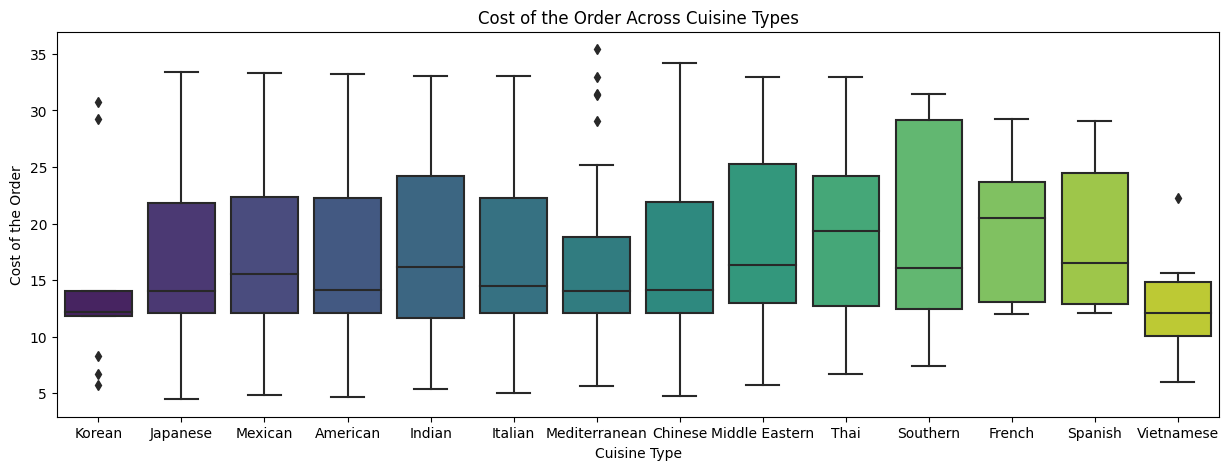

In [429]:
# Lets visualize Cuisine vs order cost in a boxplot to undertand the distribution:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', palette='viridis')
plt.title('Cost of the Order Across Cuisine Types')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.show()

#### Observartion: The analysis reveals discernible variations in average cuisine costs, with French, Southern, and Thai cuisines exhibiting relatively higher average prices. Conversely, Vietnamese cuisine stands out with the lowest average cost. The general price spectrum ranges from $13 to $20, indicating a consistent pricing pattern across most cuisine types. However, when considering individual dishes, the price range spans from $5 to $35, with Southern cuisine offering the widest range of prices. This diverse pricing landscape implies an opportunity for strategic menu positioning and price optimization, potentially leveraging the Southern cuisine's varied pricing to cater to a range of customer preferences.

#### Restaurant vs Revenue

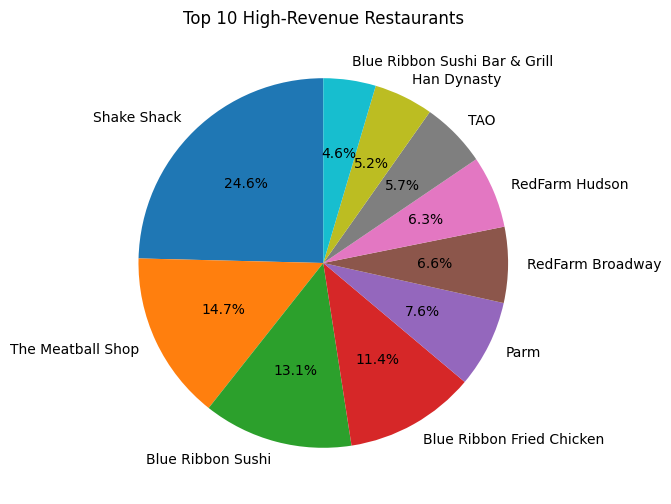

In [501]:
#Let's evaluate which are the restaurants with the highest revenue amount with a pie plot

#Top 10 high restaurants revenue
high_rev = df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(10)

#Pie plot
plt.figure(figsize=(6, 6))
plt.pie(high_rev, labels=high_rev.index, autopct='%1.1f%%', startangle=90)

plt.title('Top 10 High-Revenue Restaurants')
plt.show()


#### Rating vs Cost of the order

Text(0, 0.5, 'Order cost')

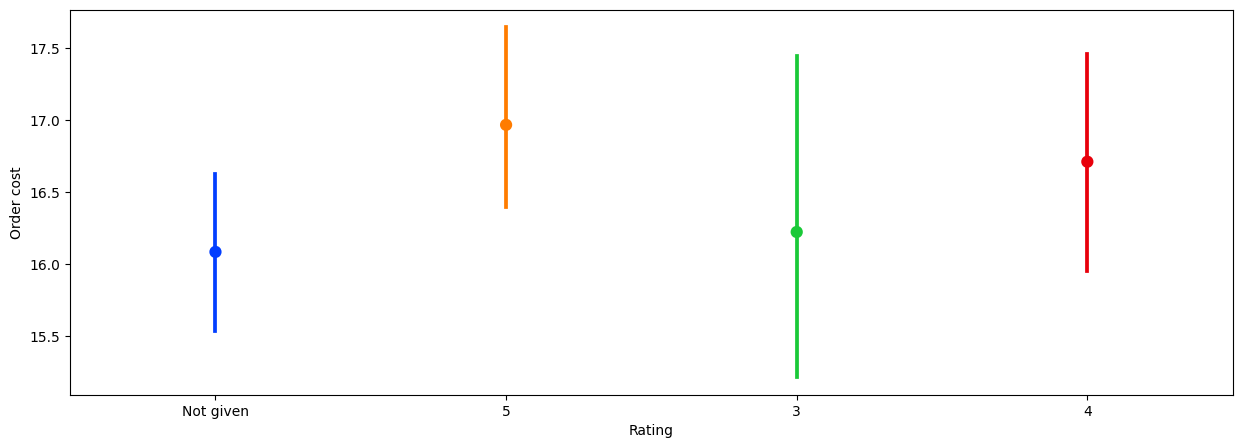

In [491]:
#Let's compare rating vs the cost of the order
plt.figure(figsize=(15,5))
sns.pointplot(data=df, x='rating',y='cost_of_the_order', palette='bright')
plt.xlabel('Rating')
plt.ylabel('Order cost')

#### Observation: Higher order costs tend to align with higher ratings, implying a positive connection between spending and satisfaction. Notably, fewer customers abstain from rating, indicating a propensity among higher spenders to provide feedback. While lower-cost orders often receive a rating of 3, the presence of a wide confidence interval suggests mixed responses, especially for higher-cost orders. Additionally, orders surpassing approximately $16.5 tend to secure a minimum rating of 4, emphasizing the potential impact of increased spending on positive customer perceptions. Encouraging higher-value orders could enhance overall satisfaction and feedback quality.

#### Rating vs Delivery time vs Total time

Text(0, 0.5, 'Delivery time')

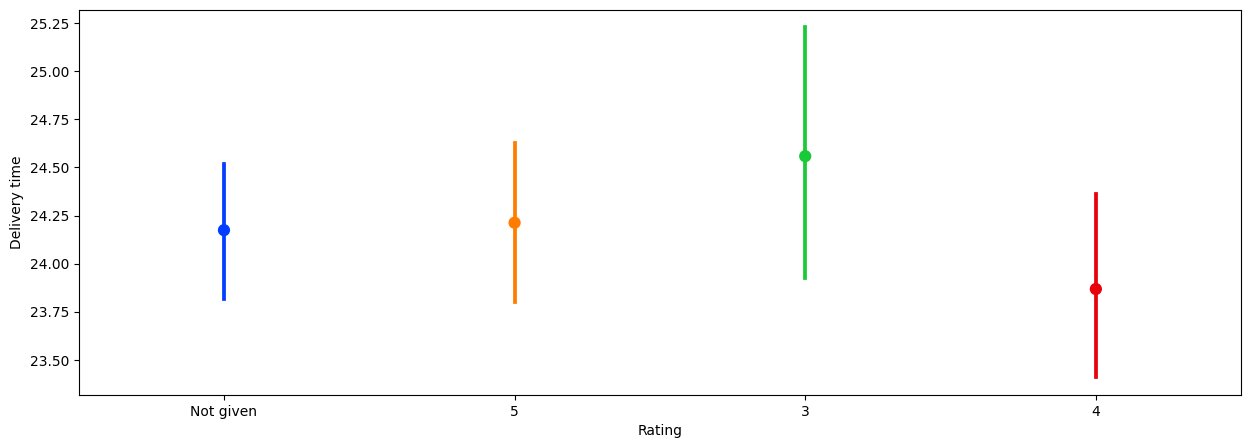

In [437]:
#Let's compare rating vs the delivery time
plt.figure(figsize=(15,5))
sns.pointplot(data=df, x='rating',y='delivery_time', palette='bright')
plt.xlabel('Rating')
plt.ylabel('Delivery time')

Text(0, 0.5, 'Total time')

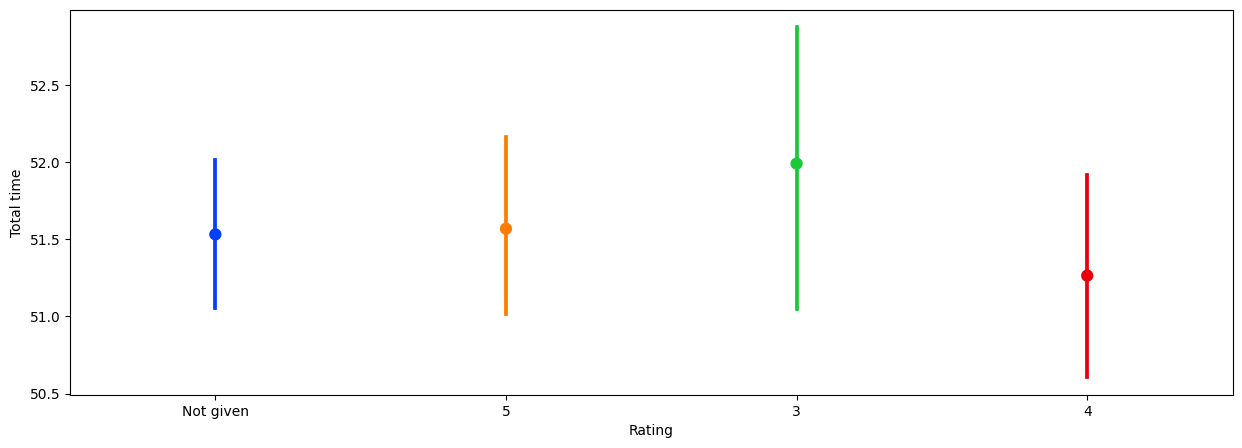

In [439]:
# Rating vs Total time to get the order

# Calculate total delivery time in a new df
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Plot
plt.figure(figsize=(15,5))
sns.pointplot(data=df, x='rating',y='total_time', palette='bright')
plt.xlabel('Rating')
plt.ylabel('Total time')

#### Observation: The pointplot shows the average of the each rating value along with its confidence interval. We can see that the delivery time and total time tends to affect the rating more when it is higher as it has a tendency to be 3. However, if the time to delivery is less than 25 minutes consumers will put 5 and 4 rating not relating it to the delivery time. So maybe other factors such as the food quality might have impacted that decision

### Questions

### **Question 1**: What percentage of the orders cost more than 20 dollars? 

In [12]:
# Orders above 20 dollars
df_highcost = df[df['cost_of_the_order'] > 20]
above_20 = df_highcost['cost_of_the_order'].count()

print('The number of total order above 20 dollars:', above_20)

#Percentage of orders above 20 dollars
percent = (above_20 / df['cost_of_the_order'].count()) * 100

print('The percentage of orders that cost more than 20 dolars:', round(percent,2), '%')

The number of total order above 20 dollars: 555
The percentage of orders that cost more than 20 dolars: 29.24 %


### **Question 2:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. 

In [472]:
top_cus = df['customer_id'].value_counts().head(3)
top_cus

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

### **Question 3:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. 

In [293]:
# As they want the avg rating we need to remove the 'not given' value to covert 'rating' to an integer. (let's use copy() to prevent altering the original df)
df_given_values = df[df['rating'] != 'Not given'].copy()
df_given_values['rating'] = df_int['rating'].astype('int')

# Let's count the ratings across restaurants for restaurants who don't have the 'Not given' values
df_count = df_given_values.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()

# Let's filter for the rating count of more than 50 
rating_50 = df_count[df_count['rating'] > 50]['restaurant_name']
df_50 = df_given_values[df_given_values['restaurant_name'].isin(rating_50)].copy()

# Now let's group the restaurant names and their rating 
fulfill_rest = df_50.groupby(['restaurant_name'])['rating'].mean().round(2).sort_values(ascending=False).reset_index()

print('The restaurants that fulfill the criteria are:')
fulfill_rest


The restaurants that meet the conditions are:


,restaurant_name,rating
0,The Meatball Shop,4.51
1,Blue Ribbon Fried Chicken,4.33
2,Shake Shack,4.28
3,Blue Ribbon Sushi,4.22


#### Observations: The restaurants that fulfill the criteria are: The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack and Blue Ribbon Sushi	


### **Question 4:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [4]:
# Let's create a function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)

total_rev = df['Revenue'].sum() 
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations: The net revenue generated by the company across all orders is 6166.3 dollars


### **Question 5:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) 

In [6]:
# Calculate total delivery time in a new df
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

#Let's count the orders abover 60 min in o
above_60 = df[df['total_time'] > 60]
df_60 = above_60['total_time'].count()

#Let's find the percentage

percent = (df_60/ df['total_time'].count())*100
print('The percentage of orders that take more than 60min in total:', round(percent,2), '%')

The percentage of orders that take more than 60min in total: 10.54 %


#### Observations: The percentage of orders that take more than 60min in total: 10.54 minutes


### **Question 6:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? 

In [356]:
# Mean weekdays delivery time 
mean_wd = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
print('The mean delivery time in weekdays:', round(mean_wd,2), 'minutes')
# Mean weekend delivery time 
mean_wk = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print('The mean delivery time in the weekend:', round(mean_wk,2), 'minutes')



The mean delivery time in weekdays: 28.34 minutes
The mean delivery time in the weekend: 22.47 minutes


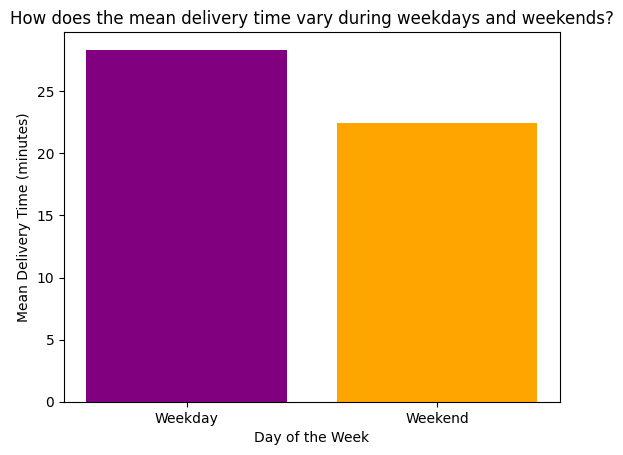

In [358]:
# Let's create a bar plot to visualize the mean delivery times

days = ['Weekday', 'Weekend']
mean_delivery_times = [mean_wd, mean_wk]

plt.bar(days, mean_delivery_times, color=['purple', 'orange'])
plt.xlabel('Day of the Week')
plt.ylabel('Mean Delivery Time (minutes)')
plt.title('How does the mean delivery time vary during weekdays and weekends?')
plt.show()

#### Observations: We can conclude that in weekdays the delivery time increases by 6 minutes


---